## First benchmark

To benchmark: estimating disassembly indexes for increasing levels of complex peptidomes


        

In [1]:
from disassembly.simulate_proteolysis import enzyme_set, enzyme, amino_acids



kr = enzyme_set(
    [
        enzyme({"K":1}, "K protease"),
    ],
    [1],
    [1],
)


viat = enzyme_set(
    [
        enzyme({"V": 0.35, "I": 0.25, "A": 0.2, "T": 0.1}, "V+I+A+T protease"),
    ],
    [1],
    [1],
)

random = enzyme_set(
    [enzyme({aa: 1 / len(amino_acids) for aa in amino_acids.values()}, "random")],
    [1],
    [1],
)
protein = "MKAAVLTLAVLFLTGSQARHFWQQDEPPQSPWDRVKDLATVYVDVLKDSGRDYVSQFEGSALGKQLNLKLLDNWDSVTSTFSKLREQLGPVTQEFWDNLEKETEGLRQEMSKDLEEVKAKVQPYLDDFQKKWQEEMELYRQKVEPLRAELQEGARQKLHELQEKLSPLGEEMRDRARAHVDALRTHLAPYSDELRQRLAARLEALKENGGARLAEYHAKATEHLSTLSEKAKPALEDLRQGLLPVLESFKVSFLSALEEYTKKLNTQ"

In [2]:
from disassembly.benchmark import Benchmark

n_iterations = 10
bmrk = Benchmark()

enzyme_sets = [kr, viat, random]
enzyme_names = ["K", "V+I+A+T", "random"]

bmrk.simulate_degradation(
    protein,
    enzyme_sets=enzyme_sets,
    enzyme_names=enzyme_names,
    n_generate=100,
    endo_or_exo_probability=[0.9,0.1],
    iterations=n_iterations,
)

Running K, 0
 37 / 1000 (60)

/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:227: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values()) for p in index_to_cut.values()


 999 / 1000 (2184)
143 unique peptides. 1003 total

 Averaged DI: 2.08
Running K, 1
 999 / 1000 (2231)
136 unique peptides. 1003 total

 Averaged DI: 2.07
Running K, 2
 999 / 1000 (2357)
139 unique peptides. 1003 total

 Averaged DI: 2.23
Running K, 3
 999 / 1000 (2215)
145 unique peptides. 1003 total

 Averaged DI: 2.23
Running K, 4
 999 / 1000 (2366)
145 unique peptides. 1003 total

 Averaged DI: 2.23
Running K, 5
 999 / 1000 (2104)
140 unique peptides. 1003 total

 Averaged DI: 2.31
Running K, 6
 999 / 1000 (2284)
147 unique peptides. 1003 total

 Averaged DI: 2.17
Running K, 7
 999 / 1000 (2162)
135 unique peptides. 1003 total

 Averaged DI: 2.19
Running K, 8
 999 / 1000 (2061)
128 unique peptides. 1003 total

 Averaged DI: 2.07
Running K, 9
 999 / 1000 (2092)
140 unique peptides. 1003 total

 Averaged DI: 2.14
Running V+I+A+T, 0
 999 / 1000 (2125)
277 unique peptides. 1003 total

 Averaged DI: 2.29
Running V+I+A+T, 1
 999 / 1000 (2021)
302 unique peptides. 1003 total

 Averaged DI

KeyboardInterrupt: 

<Axes: xlabel='d', ylabel='Density'>

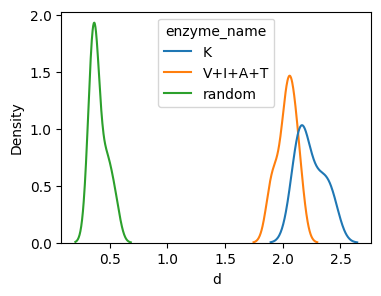

In [ ]:
dct = {"enzyme_name":[],"iteration":[],"d":[]}

for enzyme_name in bmrk.enzyme_names:
    for iteration in range(bmrk.iterations):
        dct["enzyme_name"].append(enzyme_name)
        dct["iteration"].append(iteration)
        dct["d"].append(bmrk.results["real"][enzyme_name][iteration]["d"])

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dct_df = pd.DataFrame(dct)
plt.figure(figsize=(4,3))
sns.kdeplot(pd.DataFrame(dct), x="d", hue="enzyme_name")

<Axes: xlabel='di', ylabel='count'>

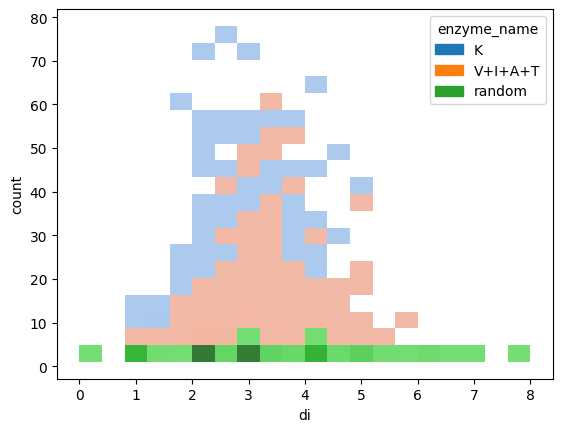

In [ ]:
dct = {"peptide":[], "di":[], "count":[] ,"enzyme_name":[]}

for enzyme_name in bmrk.enzyme_names:
    for iteration in range(bmrk.iterations):
        counts = bmrk.simulated_peptidomes[enzyme_name][iteration]
        di = bmrk.results["real"][enzyme_name][iteration]["di"]
        for sequence in counts.keys():
            dct["peptide"].append(sequence)
            dct["di"].append(di[sequence])
            dct["count"].append(counts[sequence])
            dct["enzyme_name"].append(enzyme_name)

dct_df = pd.DataFrame(dct)
sns.histplot(dct_df, x="di", y="count", hue="enzyme_name", bins=20)

--K+R---
 63 / 500 | 0.00, mean: 0.00 | Plateau | nz: 399396

/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 405
Learning rate decreased to 0.5
 104 / 500 | 0.00, mean: 0.00 | Plateau | nz: 405
 Averaged DI: 2.51
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 621553
Learning rate decreased to 0.5
 107 / 500 | 0.00, mean: 0.00 | Plateau | nz: 621
 Averaged DI: 2.83
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 605548
Learning rate decreased to 0.5
 106 / 500 | 0.00, mean: 0.00 | Plateau | nz: 606
 Averaged DI: 3.00
--V+I+A+T---
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 1042000
Learning rate decreased to 0.5
 122 / 500 | 0.00, mean: 0.00 | Plateau | nz: 1052
 Averaged DI: 3.21
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 1221202
Learning rate decreased to 0.5
 126 / 500 | 0.00, mean: 0.00 | Plateau | nz: 1237
 Averaged DI: 3.31
 99 / 500 | 0.00, mean: 0.00 | Plateau | nz: 1215172
Learning rate decreased to 0.5
 126 / 500 | 0.00, mean: 0.00 | Plateau | nz: 1214
 Averaged DI: 3.42
--random---
 58 / 500 | 0.02, mean: 0.04 | Decreasing | nz: 1327

KeyboardInterrupt: 

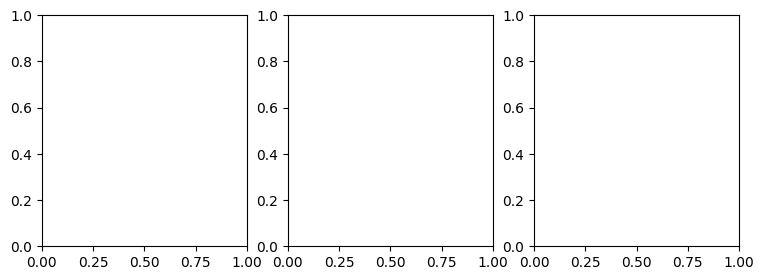

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(9,3))

bmrk.estimate_weights(method="alg", n_iterations=500, lr=1)

bmrk.plot(axs[0], ptype="loss", method_name="alg")
bmrk.plot(axs[1], ptype="corr_di", method_name="alg")
bmrk.plot(axs[2], ptype="d", method_name="alg")

--simple---
 0 / 500 | 2.31, kl: 2.31, reg: 0.00  | nz: 573 | 

 499 / 500 | 0.17, kl: 0.17, reg: 0.00  | nz: 573 | 
 Averaged DI: 2.43
 499 / 500 | 0.03, kl: 0.03, reg: 0.00  | nz: 474 | 
 Averaged DI: 2.44
 499 / 500 | 0.19, kl: 0.19, reg: 0.00  | nz: 474 | 
 Averaged DI: 2.40
 499 / 500 | 0.14, kl: 0.14, reg: 0.00  | nz: 463 | 
 Averaged DI: 2.49
 499 / 500 | 0.97, kl: 0.97, reg: 0.00  | nz: 497 | 
 Averaged DI: 2.59
 499 / 500 | 0.61, kl: 0.61, reg: 0.00  | nz: 538 | 
 Averaged DI: 2.52
 499 / 500 | 0.31, kl: 0.31, reg: 0.00  | nz: 480 | 
 Averaged DI: 2.55
 499 / 500 | 0.60, kl: 0.60, reg: 0.00  | nz: 421 | 
 Averaged DI: 2.47
 499 / 500 | 0.76, kl: 0.76, reg: 0.00  | nz: 546 | 
 Averaged DI: 2.41
 499 / 500 | 0.01, kl: 0.01, reg: 0.00  | nz: 406 | 
 Averaged DI: 2.46
--medium---
 499 / 500 | 0.42, kl: 0.42, reg: 0.00  | nz: 972 | 
 Averaged DI: 2.57
 499 / 500 | 1.62, kl: 1.62, reg: 0.00  | nz: 1100 | 
 Averaged DI: 2.71
 499 / 500 | 0.98, kl: 0.98, reg: 0.00  | nz: 1023 | 
 Averaged DI: 2.57
 499 / 500 | 0.51, kl: 0.51, reg: 0.00  | nz: 1059

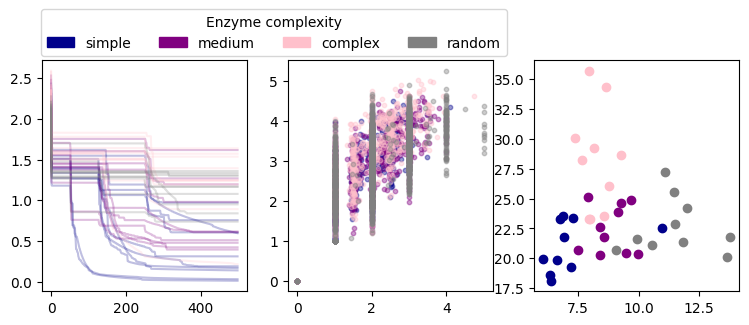

In [ ]:
lr_scheduler = {}
steps = [50, 125, 250, 400, 500]
lrs = [1, 0.1, 0.01, 0.001, 0.0001]
for lr, step in zip(lrs, steps):
    for i in range(step):
        if i not in lr_scheduler:
            lr_scheduler[i] = lr

bmrk.estimate_weights(method="gd", lr_scheduler=lr_scheduler, n_iterations=500)

fig, axs = plt.subplots(1, 3, figsize=(9,3))

bmrk.plot(ax=axs[0], ptype="loss", method_name="gd")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd")
bmrk.plot(ax=axs[2], ptype="d", method_name="gd")

In [ ]:
bmrk.estimate_weights(method="gd", lam1=0.1, lr_scheduler=lr_scheduler, n_iterations=500, method_name="gd_l1")

fig, axs = plt.subplots(1, 3, figsize=(9,3))

bmrk.plot(ax=axs[0], ptype="loss", method_name="gd_l1")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd_l1")
bmrk.plot(ax=axs[2], ptype="d", method_name="gd_l1")

--simple---
 0 / 500 | 7.61, kl: 2.29, reg: 5.32  | nz: 573 | 

 499 / 500 | 3.69, kl: 0.11, reg: 3.58  | nz: 573 | 
 Averaged DI: 2.55
 499 / 500 | 3.57, kl: 0.17, reg: 3.40  | nz: 474 | 
 Averaged DI: 2.36
 76 / 500 | 6.18, kl: 1.28, reg: 4.90  | nz: 474 | 

KeyboardInterrupt: 

--simple---
 49 / 50 | 3.02, kl: 1.45, reg: 1.57  | nz: 495 | 
 Averaged DI: 2.49
 49 / 50 | 3.13, kl: 1.62, reg: 1.51  | nz: 421 | 
 Averaged DI: 2.46
 49 / 50 | 3.35, kl: 1.79, reg: 1.56  | nz: 470 | 
 Averaged DI: 2.56
--medium---
 49 / 50 | 3.94, kl: 1.49, reg: 2.45  | nz: 1010 | 
 Averaged DI: 2.67
 49 / 50 | 1.04, kl: 0.12, reg: 0.92  | nz: 1008 | 
 Averaged DI: 2.67
 49 / 50 | 3.93, kl: 1.54, reg: 2.39  | nz: 879 | 
 Averaged DI: 2.49
--complex---
 49 / 50 | 4.14, kl: 1.76, reg: 2.38  | nz: 1285 | 
 Averaged DI: 2.78
 49 / 50 | 3.98, kl: 1.76, reg: 2.22  | nz: 1473 | 
 Averaged DI: 2.73
 49 / 50 | 4.32, kl: 1.81, reg: 2.51  | nz: 1295 | 
 Averaged DI: 2.84
--random---
 49 / 50 | 5.26, kl: 1.44, reg: 3.82  | nz: 2061 | 
 Averaged DI: 2.86
 49 / 50 | 5.03, kl: 1.23, reg: 3.80  | nz: 1873 | 
 Averaged DI: 2.79
 49 / 50 | 4.80, kl: 1.29, reg: 3.52  | nz: 2033 | 
 Averaged DI: 2.82


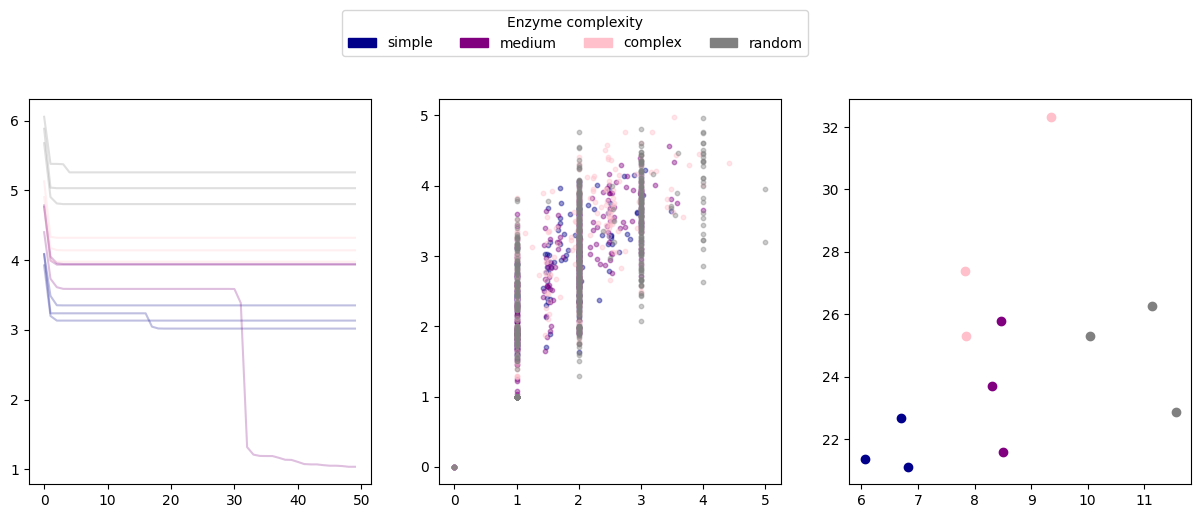

In [ ]:
bmrk.estimate_weights(method="gd", lam2=0.1, lr_scheduler=lr_scheduler, n_iterations=500, method_name="gd_l2")

fig, axs = plt.subplots(1, 3, figsize=(9,3))

bmrk.plot(ax=axs[0], ptype="loss", method_name="gd_l2")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd_l2")
bmrk.plot(ax=axs[2], ptype="d", method_name="gd_l2")

In [ ]:
# bmrk.estimate_weights(
#   method="gd",
#    lr_scheduler=lr_scheduler, n_iterations=500,
#    lam1=0,
#    lam2=0,
#    parameter_estimator=True,
#    method_name="gd_param",
# )

# fig, axs = plt.subplots(1, 3, figsize=(9,3))#

# bmrk.plot(ax=axs[0], ptype="loss", method_name="gd_param")
# bmrk.plot(ax=axs[1], ptype="corr_di", method_name="gd_param")
# bmrk.plot(ax=axs[2], ptype="d", method_name="gd_param")

<Axes: xlabel='enzyme', ylabel='error'>

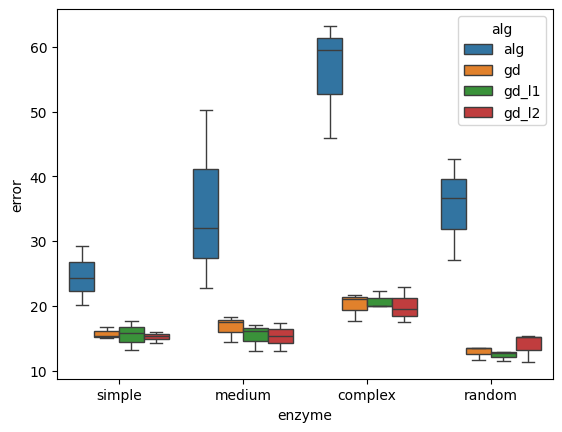

In [ ]:
import pandas as pd
import numpy as np

df = {"alg": [], "enzyme": [], "error": []}
for alg in bmrk.results.keys():
    if alg == "real":
        continue
    for enzyme_name in enzyme_names:

        for iteration in range(3):
            df["alg"].append(alg)
            df["enzyme"].append(enzyme_name)
            df["error"].append(
                np.abs(
                    bmrk.results["real"][enzyme_name][iteration]["d"]
                    - bmrk.results[alg][enzyme_name][iteration]["d"]
                )
            )
df = pd.DataFrame(df)
import seaborn as sns

sns.boxplot(df, x="enzyme", y="error", hue="alg")

# Peptidomes

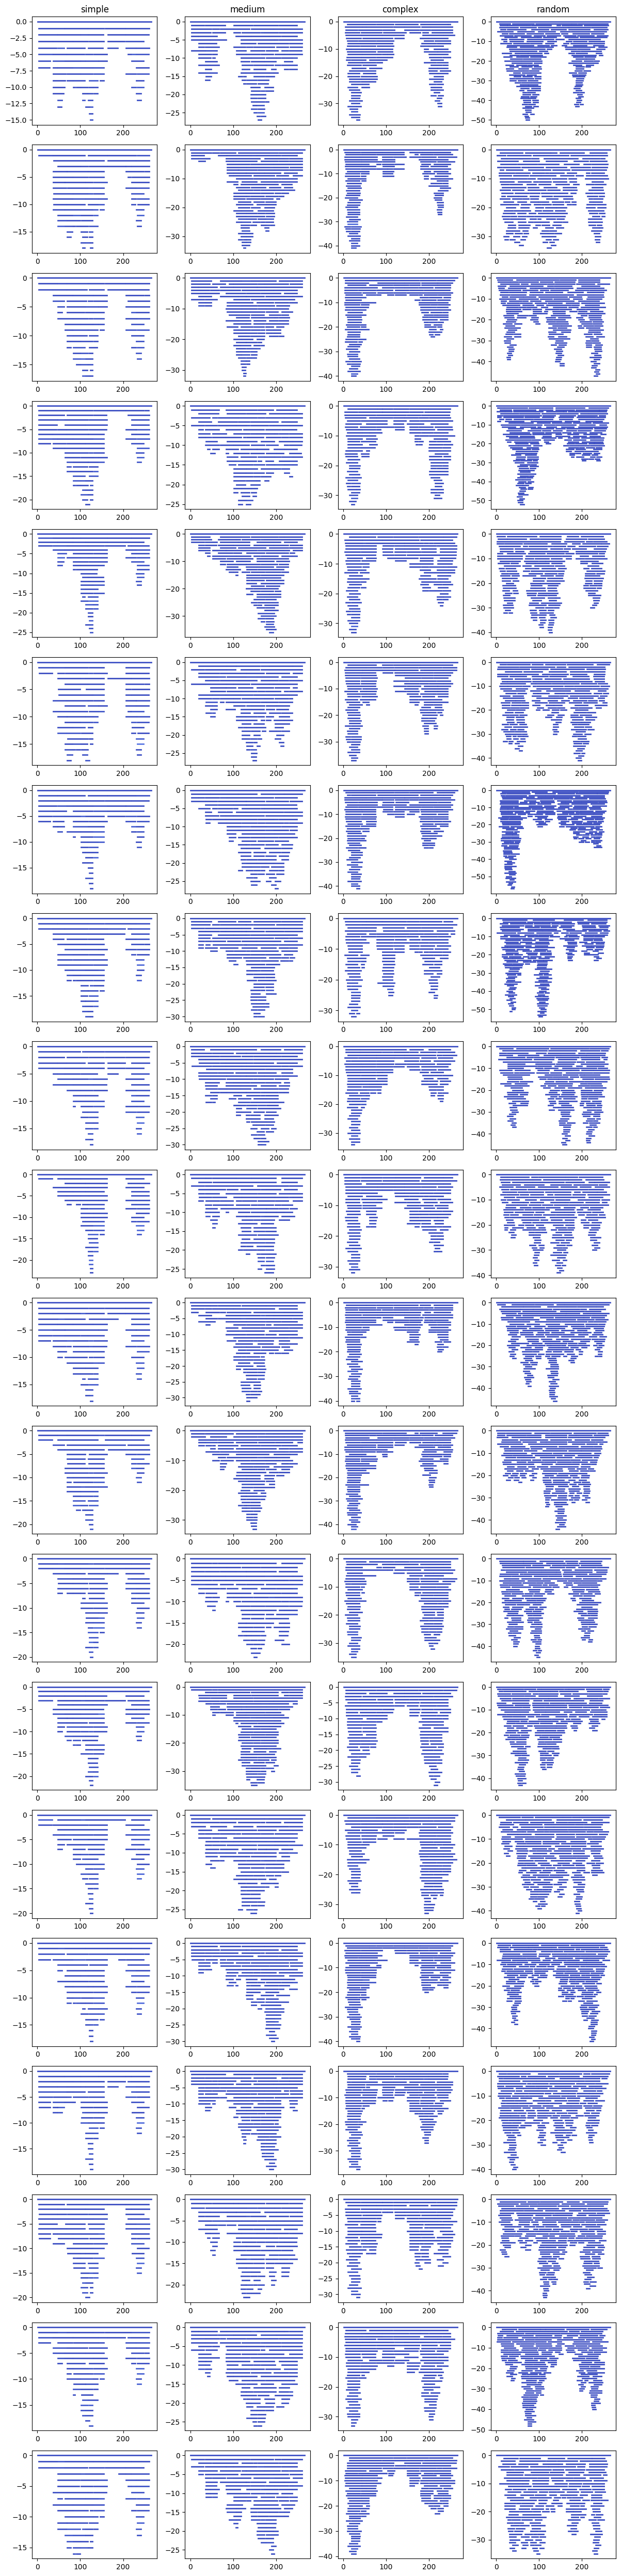

In [ ]:
from disassembly.util import plot_peptidome

fig, axs = plt.subplots(
    bmrk.iterations,
    len(bmrk.enzyme_names),
    figsize=(len(bmrk.enzyme_names) * 3, bmrk.iterations * 2.5),
)
for iteration in range(bmrk.iterations):
    for test_name in bmrk.enzyme_names:
        ax = axs[iteration, bmrk.enzyme_names.index(test_name)]
        if iteration == 0:
            ax.set_title(f"{test_name} , d={bmrk.results["real"][iteration]["d"]}")
        plot_peptidome(protein, bmrk.simulated_peptidomes[test_name][iteration], ax)
plt.tight_layout()